<a href="https://colab.research.google.com/github/sol-ops/gpt3-leukemia-information-assistant/blob/main/leukemia_detection_by_mobilenet%20for%20data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
import tensorflow


In [21]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [22]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train'
vlid_path='/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/validation'

In [23]:
mobilenet=MobileNet(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

17225924/17225924 [==============================] - 1s 0us/step


In [24]:
for layer in mobilenet.layers:
  layer.trainable=False

In [25]:
folders=glob('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/*')

In [26]:
folders

['/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/leukumized',
 '/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/normal']

In [27]:
x=Flatten()(mobilenet.output)

In [28]:
prediction=Dense(len(folders),activation='softmax')(x)

In [29]:
model=Model(inputs=mobilenet.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [30]:
model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy']
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)




In [32]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train',target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 260 images belonging to 2 classes.


In [33]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/test',
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical')

Found 26 images belonging to 2 classes.


In [34]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-34-b4b2878d2ea9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
17/17 [==============================] - 19s 1s/step - loss: 1.5906 - accuracy: 0.8077 - val_loss: 1.0253 - val_accuracy: 0.8462
Epoch 2/10
17/17 [==============================] - 16s 933ms/step - loss: 0.2693 - accuracy: 0.9538 - val_loss: 0.1376 - val_accuracy: 0.9615
Epoch 3/10
17/17 [==============================] - 16s 935ms/step - loss: 0.3018 - accuracy: 0.9423 - val_loss: 0.2023 - val_accuracy: 0.9615
Epoch 4/10
17/17 [==============================] - 16s 936ms/step - loss: 0.2831 - accuracy: 0.9423 - val_loss: 0.1920 - val_accuracy: 0.9615
Epoch 5/10
17/17 [==============================] - 16s 934ms/step - loss: 0.8292 - accuracy: 0.9038 - val_loss: 0.0699 - val_accuracy: 0.9615
Epoch 6/10
17/17 [==============================] - 16s 931ms/step - loss: 0.1897 - accuracy: 0.9615 - val_loss: 8.5739e-04 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 16s 960ms/step - loss: 0.0480 - accuracy: 0.9923 - val_loss: 0.1198 - val_accuracy: 0.961

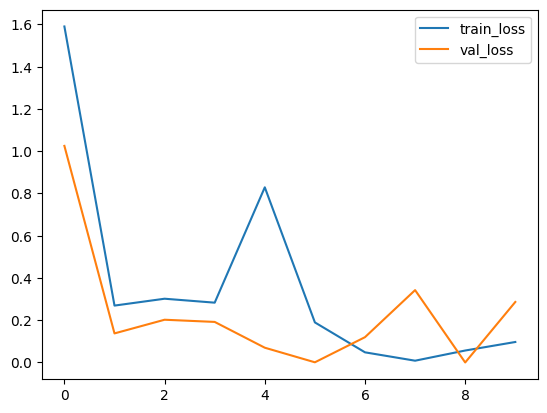

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


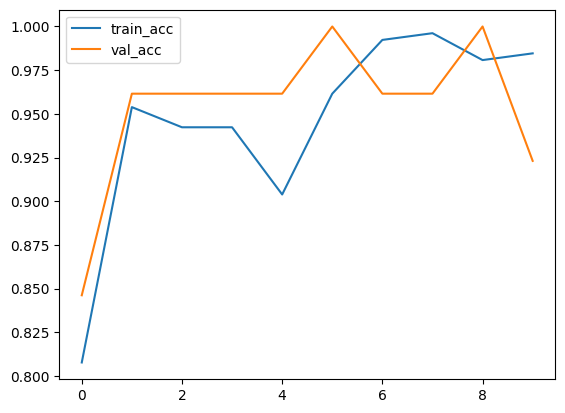

<Figure size 640x480 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')